In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("C:/Users/Stijn Daemen/Documents/master thesis TU Delft/code/IAM_RICE2/jupyter notebooks/Basic RICE - Nordhaus Policy - 2.xlsx", sheet_name='US', index_col=0)

In [3]:
# df['ml_/10'] = df['ml']/10
# df.drop('ml', inplace=True, axis=1)

In [4]:
df.head()

mu         S         E   damages  abatement_cost  \
2005  0.000433  0.178518  1.661414  0.012066    1.284707e-12   
2015  0.154826  0.204412  1.372402  0.021701    3.455889e-05   
2025  0.219840  0.211676  1.399242  0.041950    1.490240e-04   
2035  0.284853  0.215309  1.386254  0.075608    4.326830e-04   
2045  0.349866  0.218941  1.335268  0.125451    9.942056e-04   

      abatement_fraction  SLRDAMAGES  gross_output  net_output         I  ...  \
2005        1.036229e-13    0.000000     12.397900   12.385834  2.211093  ...   
2015        2.163539e-06    0.000755     15.973313   15.951577  3.260689  ...   
2025        7.199390e-06    0.001135     20.699527   20.657429  4.372690  ...   
2035        1.670830e-05    0.001938     25.896292   25.820251  5.559326  ...   
2045        3.168471e-05    0.003127     31.378090   31.251644  6.842270  ...   

      total_factor_productivity  capital_stock  sigma_ratio      Eind  \
2005                  11.347695      22.851100     0.134066  1.661414   
2015                  12.612229      30.078619     0.101658  1.372402   
2025                  13.907986      43.094654     0.086646  1.399242   
2035                  15.228235      58.753079     0.074853  1.386254   
2045                  16.566912      76.079196     0.065454  1.335268   

      sigma_gr  damage_frac  SLRTHERM   GSICCUM    GISCUM    AISCUM  
2005 -0.022476     0.000974  0.099842  0.014640  0.006000  0.001225  
2015 -0.017476     0.001358  0.109235  0.022039  0.012000  0.001279  
2025 -0.015978     0.002026  0.121014  0.030803  0.031389 -0.000360  
2035 -0.014630     0.002919  0.135396  0.040934  0.053365 -0.003871  
2045 -0.013417     0.003997  0.152375  0.052267  0.077990 -0.009290  

[5 rows x 34 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 2005 to 2305
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   mu                         31 non-null     float64
 1   S                          31 non-null     float64
 2   E                          31 non-null     float64
 3   damages                    31 non-null     float64
 4   abatement_cost             31 non-null     float64
 5   abatement_fraction         31 non-null     float64
 6   SLRDAMAGES                 31 non-null     float64
 7   gross_output               31 non-null     float64
 8   net_output                 31 non-null     float64
 9   I                          31 non-null     float64
 10  CPC                        31 non-null     float64
 11  forc                       31 non-null     float64
 12  temp_atm                   31 non-null     float64
 13  temp_ocean                 31 non-null     floa

Determine wheter there is noise present in the indicator variables

In [6]:
range_dict = {}
for col in df.columns:
    range_dict[col] = df[col].max() - df[col].min()

In [7]:
range_dict

{'mu': 0.9995671613031831,
 'S': 0.0694820808331677,
 'E': 1.66141401941937,
 'damages': 1.81200412833869,
 'abatement_cost': 0.08531268984930805,
 'abatement_fraction': 0.0005842910638453382,
 'SLRDAMAGES': 0.1988565972711264,
 'gross_output': 217.9906036285516,
 'net_output': 216.1771635436925,
 'I': 54.47253007995959,
 'CPC': 325.4876963518411,
 'forc': 2.758159794924347,
 'temp_atm': 2.110288818456673,
 'temp_ocean': 1.9307479126444331,
 'global_damages': 30.85955396522145,
 'global_output': 2323.4256544397504,
 'global_period_util_ww': 3485.006584579478,
 'TOTAL_SLR': 1.2824086610109158,
 'mat': 464.88919370838994,
 'mup': 779.0852518323468,
 'ml': 90.18190375085942,
 'forcoth': 0.36,
 'E_worldwide_per_year': 10.371597833722552,
 'labour_force': 180.91299086455848,
 'total_factor_productivity': 40.39642590964726,
 'capital_stock': 790.9517241748408,
 'sigma_ratio': 0.12043555494051096,
 'Eind': 1.66141401941937,
 'sigma_gr': 0.019270302944330422,
 'damage_frac': 0.0112513506052213

In [8]:
list_1 = []
list_2 = []
list_3 = []
list_4 = []
for key, value in range_dict.items():
    if value < 1:
        list_1.append(key)
    elif 1 <= value < 10:
        list_2.append(key)
    elif 10 <= value < 100:
        list_3.append(key)
    elif value > 100:
        list_4.append(key)
    else:
        print(value)
# Remove ml from fig because it distorts all the other figures
list_3.remove('ml')     
# list_4.append('ml')

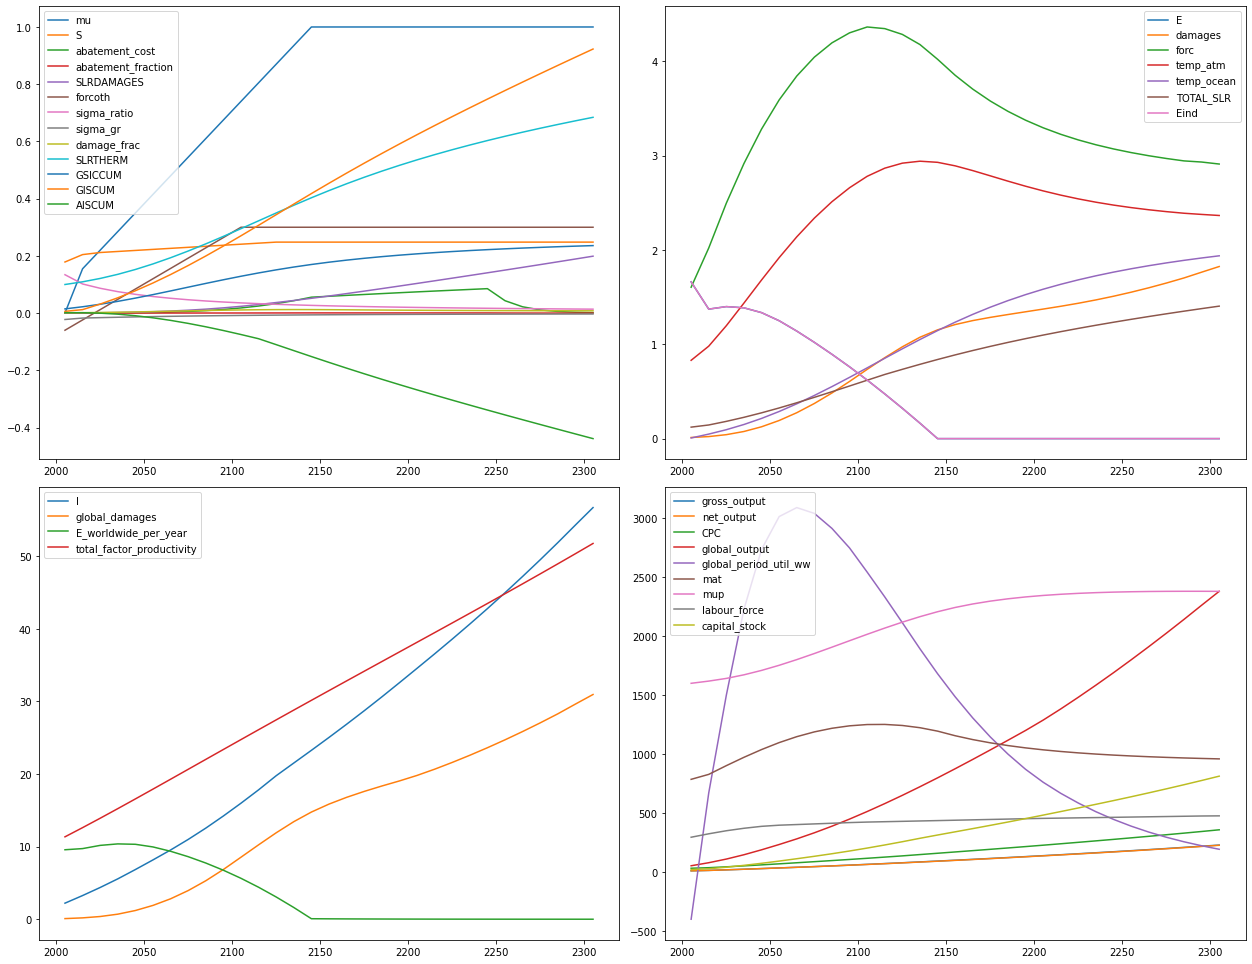

In [26]:

plt.rcParams["figure.figsize"] = [17.50, 13.50]
# plt.figure(figsize=(20,10)) 
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=False)

for col in list_1:
    df[col].plot(ax=axes[0,0], legend=True)
    
for col in list_2:
    df[col].plot(ax=axes[0,1], legend=True)
    
for col in list_3:
    df[col].plot(ax=axes[1,0], legend=True)
    
for col in list_4:
    df[col].plot(ax=axes[1,1], legend=True)
    
# plt.show()
# plt.savefig('Basic RICE - Nordhaus Policy - 2 - indicator_vars.png', dpi=100, facecolor='w')

Determine maximum and minimum values for all possible indicators

In [35]:
df_dict = {}
for col in df.columns:
    df_dict[col] = {}
    df_dict[col]['max'] = df[col].max()
    df_dict[col]['min'] = df[col].min()
    df_dict[col]['max_50_perc'] = df[col].max()*1.5
    df_dict[col]['min_50_perc'] = df[col].min()*0.5

In [36]:
df_bounds = pd.DataFrame.from_dict(df_dict)

In [37]:
df_bounds.head()

mu         S         E   damages  abatement_cost  \
max          1.000000  0.248000  1.661414  1.824070    8.531269e-02   
min          0.000433  0.178518  0.000000  0.012066    1.284707e-12   
max_50_perc  1.500000  0.372000  2.492121  2.736105    1.279690e-01   
min_50_perc  0.000216  0.089259  0.000000  0.006033    6.423533e-13   

             abatement_fraction  SLRDAMAGES  gross_output  net_output  \
max                5.842911e-04    0.198857    230.388504  228.562998   
min                1.036229e-13    0.000000     12.397900   12.385834   
max_50_perc        8.764366e-04    0.298285    345.582756  342.844496   
min_50_perc        5.181146e-14    0.000000      6.198950    6.192917   

                     I  ...  total_factor_productivity  capital_stock  \
max          56.683623  ...                  51.744121     813.802824   
min           2.211093  ...                  11.347695      22.851100   
max_50_perc  85.025435  ...                  77.616182    1220.704236   
min_50_perc   1.105547  ...                   5.673848      11.425550   

             sigma_ratio      Eind  sigma_gr  damage_frac  SLRTHERM   GSICCUM  \
max             0.134066  1.661414 -0.003205     0.012226  0.684248  0.235818   
min             0.013630  0.000000 -0.022476     0.000974  0.099842  0.014640   
max_50_perc     0.201099  2.492121 -0.004808     0.018338  1.026372  0.353727   
min_50_perc     0.006815  0.000000 -0.011238     0.000487  0.049921  0.007320   

               GISCUM    AISCUM  
max          0.922910  0.001279  
min          0.006000 -0.438860  
max_50_perc  1.384365  0.001919  
min_50_perc  0.003000 -0.219430  

[4 rows x 34 columns]

In [39]:
# df_bounds.T.to_excel("indicator variable bounds.xlsx")

In [40]:
df_bounds.T

max           min   max_50_perc  \
mu                             1.000000  4.328387e-04      1.500000   
S                              0.248000  1.785179e-01      0.372000   
E                              1.661414  0.000000e+00      2.492121   
damages                        1.824070  1.206617e-02      2.736105   
abatement_cost                 0.085313  1.284707e-12      0.127969   
abatement_fraction             0.000584  1.036229e-13      0.000876   
SLRDAMAGES                     0.198857  0.000000e+00      0.298285   
gross_output                 230.388504  1.239790e+01    345.582756   
net_output                   228.562998  1.238583e+01    342.844496   
I                             56.683623  2.211093e+00     85.025435   
CPC                          359.764251  3.427655e+01    539.646376   
forc                           4.362845  1.604685e+00      6.544267   
temp_atm                       2.940289  8.300000e-01      4.410433   
temp_ocean                     1.937548  6.800000e-03      2.906322   
global_damages                30.946826  8.727239e-02     46.420240   
global_output               2378.717328  5.529167e+01   3568.075992   
global_period_util_ww       3087.704200 -3.973024e+02   4631.556301   
TOTAL_SLR                      1.404115  1.217067e-01      2.106173   
mat                         1251.889194  7.870000e+02   1877.833791   
mup                         2379.085252  1.600000e+03   3568.627878   
ml                         10100.181904  1.001000e+04  15150.272856   
forcoth                        0.300000 -6.000000e-02      0.450000   
E_worldwide_per_year          10.373579  1.980704e-03     15.560368   
labour_force                 477.755569  2.968426e+02    716.633353   
total_factor_productivity     51.744121  1.134770e+01     77.616182   
capital_stock                813.802824  2.285110e+01   1220.704236   
sigma_ratio                    0.134066  1.363017e-02      0.201099   
Eind                           1.661414  0.000000e+00      2.492121   
sigma_gr                      -0.003205 -2.247568e-02     -0.004808   
damage_frac                    0.012226  9.741915e-04      0.018338   
SLRTHERM                       0.684248  9.984168e-02      1.026372   
GSICCUM                        0.235818  1.464000e-02      0.353727   
GISCUM                         0.922910  6.000000e-03      1.384365   
AISCUM                         0.001279 -4.388604e-01      0.001919   

                            min_50_perc  
mu                         2.164193e-04  
S                          8.925896e-02  
E                          0.000000e+00  
damages                    6.033087e-03  
abatement_cost             6.423533e-13  
abatement_fraction         5.181146e-14  
SLRDAMAGES                 0.000000e+00  
gross_output               6.198950e+00  
net_output                 6.192917e+00  
I                          1.105547e+00  
CPC                        1.713828e+01  
forc                       8.023426e-01  
temp_atm                   4.150000e-01  
temp_ocean                 3.400000e-03  
global_damages             4.363619e-02  
global_output              2.764584e+01  
global_period_util_ww     -1.986512e+02  
TOTAL_SLR                  6.085334e-02  
mat                        3.935000e+02  
mup                        8.000000e+02  
ml                         5.005000e+03  
forcoth                   -3.000000e-02  
E_worldwide_per_year       9.903520e-04  
labour_force               1.484213e+02  
total_factor_productivity  5.673848e+00  
capital_stock              1.142555e+01  
sigma_ratio                6.815084e-03  
Eind                       0.000000e+00  
sigma_gr                  -1.123784e-02  
damage_frac                4.870957e-04  
SLRTHERM                   4.992084e-02  
GSICCUM                    7.320000e-03  
GISCUM                     3.000000e-03  
AISCUM                    -2.194302e-01